In [1]:
import tweepy
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
API_KEY = 'yLx9osxHYFLGjWzuQKwU8W79t'
API_SECRET = 'PDCL9FxBh5KA3l8tuE7xiCJSRolgg0KTeUbJyRkv6C9idXhV5s'
ACCESS_TOKEN = '1914210953044107264-gL8yjWpchnpiA9KT1ZldXdgajjnGWE'
ACCESS_TOKEN_SECRET = 'nr2T8myR2F7yqDFIyOARKAuclTPMHZREtlECiOXe4Gk5y'

In [3]:
auth = tweepy.OAuth1UserHandler(API_KEY, API_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)

Enter keyword/hashtag to search:  #motivation
Enter number of tweets to analyze:  60


Tweets saved to #motivation_tweets.csv


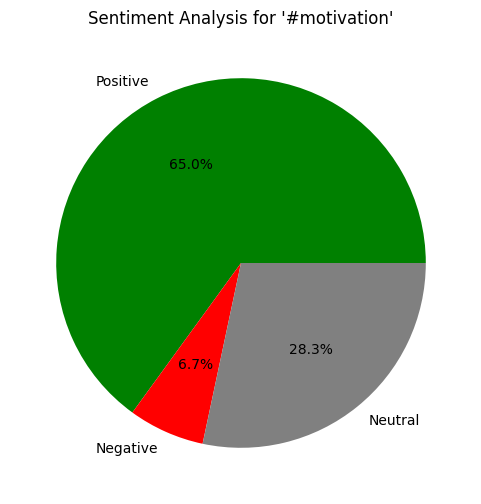

In [4]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Replace with your own credentials
bearer_token = "AAAAAAAAAAAAAAAAAAAAAJkH0wEAAAAAaRZgsqmgT0bXP79dQlw5uw4KFsI%3DURLEi96rTITvDp4fAw67llRcEGmfEZn0W3Ghwr0jjlvGp3FNZd"

client = tweepy.Client(bearer_token=bearer_token)

def fetch_tweets(keyword, count):
    tweets = []
    query = f"{keyword} -is:retweet lang:en"
    response = client.search_recent_tweets(
        query=query,
        tweet_fields=['text', 'created_at', 'public_metrics'],
        user_fields=['username', 'public_metrics'],
        expansions=['author_id'],
        max_results=count
    )

    if response.data:
        users = {u['id']: u for u in response.includes['users']} if response.includes else {}
        for tweet in response.data:
            user = users.get(tweet.author_id, {})
            tweets.append({
                'Tweet': tweet.text,
                'Likes': tweet.public_metrics['like_count'],
                'Retweets': tweet.public_metrics['retweet_count'],
                'Username': user.get('username', 'Unknown'),
                'Follower_Count': user.get('public_metrics', {}).get('followers_count', 0),
                'Created_At': tweet.created_at
            })
    return tweets

def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

def main():
    keyword = input("Enter keyword/hashtag to search: ")
    count = int(input("Enter number of tweets to analyze: "))

    tweets = fetch_tweets(keyword, count)
    sentiment_counts = {'Positive': 0, 'Negative': 0, 'Neutral': 0}
    tweet_data = []

    for tweet in tweets:
        sentiment = analyze_sentiment(tweet['Tweet'])
        sentiment_counts[sentiment] += 1
        tweet_data.append([
            tweet['Tweet'], 
            sentiment, 
            tweet['Likes'], 
            tweet['Retweets'], 
            tweet['Username'], 
            tweet['Follower_Count'], 
            tweet['Created_At']
        ])

    # Save to CSV
    df = pd.DataFrame(tweet_data, columns=['Tweet', 'Sentiment', 'Likes', 'Retweets', 'Username', 'Follower_Count', 'Created_At'])
    df.to_csv("treanding_tweets.csv", index=False)
    print(f"Tweets saved to {keyword}_tweets.csv")

    # Plot pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(sentiment_counts.values(), labels=sentiment_counts.keys(), autopct='%1.1f%%', colors=['green', 'red', 'gray'])
    plt.title(f"Sentiment Analysis for '{keyword}'")
    plt.show()

if __name__ == "__main__":
    main()


In [5]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [6]:
import pandas as pd

# Load the CSV file

df = pd.read_csv('treanding_tweets.csv')

# Check for missing values
print("Missing values before handling:\n", df.isnull().sum())

# Handle missing values
df['Likes'].fillna(0, inplace=True)               # Fill missing 'Likes' with 0
df['Retweets'].fillna(0, inplace=True)            # Fill missing 'Retweets' with 0
df['Username'].fillna('Unknown', inplace=True)    # Fill missing 'Username' with 'Unknown'
df['Follower_Count'].fillna(df['Follower_Count'].mean(), inplace=True)  # Fill with mean

# Verify missing values are handled
print("\nMissing values after handling:\n", df.isnull().sum())

# Save the cleaned CSV file
clean_csv_path = '/mnt/data/cleaned_trending_tweets.csv'
df.to_csv('treanding_tweets.csv', index=False)
print(f"\nCleaned CSV saved at: {clean_csv_path}")


Missing values before handling:
 Tweet             0
Sentiment         0
Likes             0
Retweets          0
Username          0
Follower_Count    0
Created_At        0
dtype: int64

Missing values after handling:
 Tweet             0
Sentiment         0
Likes             0
Retweets          0
Username          0
Follower_Count    0
Created_At        0
dtype: int64

Cleaned CSV saved at: /mnt/data/cleaned_trending_tweets.csv


In [7]:
import shutil

# Replace with your file paths
source_file = 'treanding_tweets.csv'
destination_file = 'treanding_tweets2.csv'

# Copy the file
shutil.copyfile(source_file, destination_file)



'treanding_tweets2.csv'

In [8]:
# Remove duplicate tweets based on the 'Tweet' column
df.drop_duplicates(subset='Tweet', keep='first', inplace=True)

# Verify if duplicates are removed
print(f"Number of rows after removing duplicates: {len(df)}")


Number of rows after removing duplicates: 60


In [9]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already present
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Define function to clean text
def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Apply cleaning function to the "Tweet" column
df['Cleaned_Tweet'] = df['Tweet'].apply(clean_text)

# Save updated DataFrame
df.to_csv('treanding_tweets.csv', index=False)
print("Tweets normalized and saved to 'trending_tweets.csv'")


Tweets normalized and saved to 'trending_tweets.csv'


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91942\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Convert 'Created_At' to datetime format
df['Created_At'] = pd.to_datetime(df['Created_At'], errors='coerce')

# Extract date and time components
df['Date'] = df['Created_At'].dt.date
df['Time'] = df['Created_At'].dt.time

# Drop the original 'Created_At' column if needed
# df.drop(columns=['Created_At'], inplace=True)

# Display the first few rows to verify
print(df.head())


                                               Tweet Sentiment  Likes  \
0  Success doesn’t come overnight. It takes effor...  Negative      0   
1  Oregon State Dropout: My Unexpected Path to Su...  Positive      0   
2  Unlock Your Authentic Self: Find the You Withi...  Positive      0   
3  Quotes of the day! ✨\n#motivation https://t.co...   Neutral      0   
4  @DembeFm Good morning \nKindly drop me #Motiva...  Positive      0   

   Retweets         Username  Follower_Count                Created_At  \
0         0       SteveBalli               0 2025-04-21 06:57:03+00:00   
1         0       kidcadwell             726 2025-04-21 06:56:19+00:00   
2         0      withRosabel            7497 2025-04-21 06:56:18+00:00   
3         0  masiadahariesok              23 2025-04-21 06:55:54+00:00   
4         0         AllanGwa              45 2025-04-21 06:55:21+00:00   

                                       Cleaned_Tweet        Date      Time  
0  success doesnt come overnight takes 

In [11]:
# Save the updated DataFrame back to CSV
df.to_csv('treanding_tweets.csv', index=False)
print("Changes saved to trending_tweets.csv")


Changes saved to trending_tweets.csv


In [12]:
# Add Engagement Ratio
df['Engagement_Ratio'] = (df['Likes'] + df['Retweets']) / df['Follower_Count'].replace(0, 1)

# Extract Hour of Post
df['Hour_of_Post'] = pd.to_datetime(df['Created_At']).dt.hour

# Save the updated DataFrame
df.to_csv('treanding_tweets.csv', index=False)
print("New features added and saved to 'trending_tweets.csv'")


New features added and saved to 'trending_tweets.csv'


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the updated CSV file

df = pd.read_csv('treanding_tweets.csv')

# Check the first few rows
print(df)

# Set plot style
sns.set(style="whitegrid")


                                                Tweet Sentiment  Likes  \
0   Success doesn’t come overnight. It takes effor...  Negative      0   
1   Oregon State Dropout: My Unexpected Path to Su...  Positive      0   
2   Unlock Your Authentic Self: Find the You Withi...  Positive      0   
3   Quotes of the day! ✨\n#motivation https://t.co...   Neutral      0   
4   @DembeFm Good morning \nKindly drop me #Motiva...  Positive      0   
5   @933kfm @aggie_uwase Good morning \nKindly dro...  Positive      0   
6   Every great thing begins with a single step. T...  Positive      0   
7   No one sees the nights you doubt yourself.\nTh...  Positive      0   
8   "Don't watch the clock; do what it does. Keep ...  Positive      0   
9   Today’s Power Packed Affirmation from Power of...   Neutral      0   
10  The #pursuit of universal #approval is a never...   Neutral      0   
11  You don’t have to be extreme, just consistent....  Positive      0   
12  #OnThisDay #2024 #GoodMorning #hap

# 1. **Distribution of Sentiments**

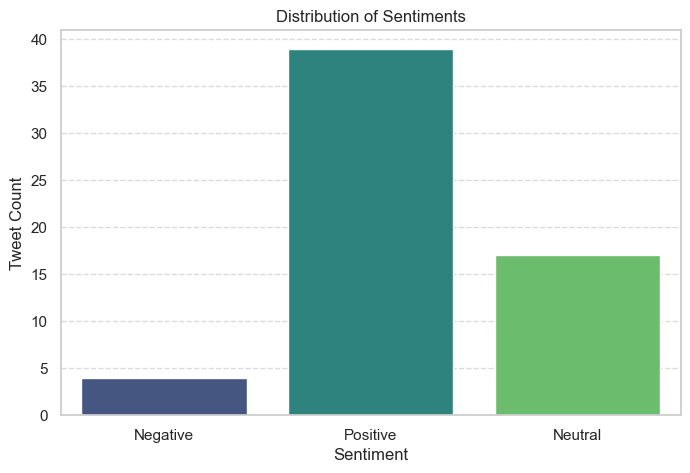

In [14]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

# Create or open the same PDF file once
pdf = PdfPages('Sentiment_Analysis_Charts.pdf')

# 1. **Distribution of Sentiments**
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title("Distribution of Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
pdf.savefig()  # Save to PDF
plt.show()




# 2. **Tweets Over Time**

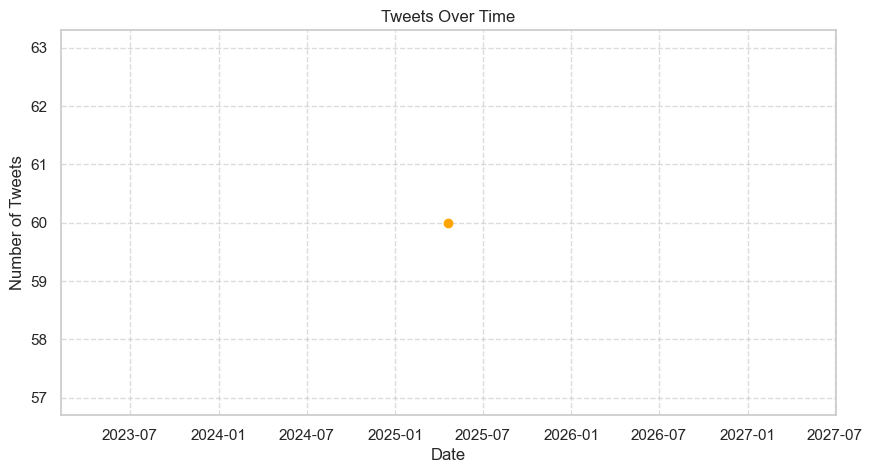

In [15]:
# 2. **Tweets Over Time**
plt.figure(figsize=(10, 5))
df['Date'] = pd.to_datetime(df['Created_At']).dt.date
tweets_per_day = df.groupby('Date').size()
tweets_per_day.plot(kind='line', color='orange', marker='o')
plt.title("Tweets Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.grid(True, linestyle='--', alpha=0.7)
pdf.savefig()  # Save to PDF
plt.show()      # Display the plot

# 3. **Engagement vs Sentiment**

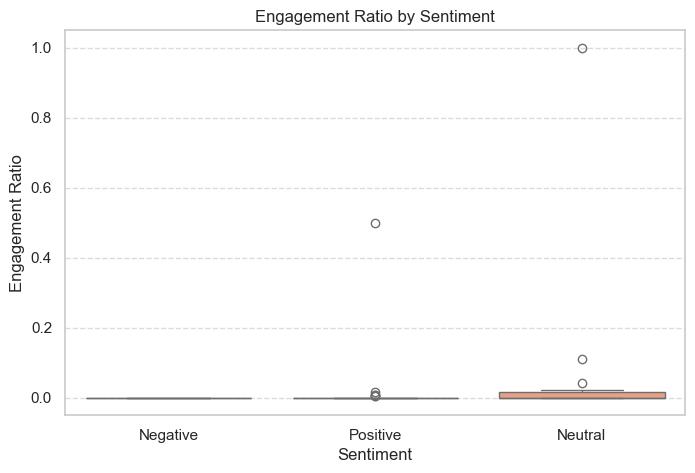

In [16]:
# 3. **Engagement vs Sentiment**
plt.figure(figsize=(8, 5))
sns.boxplot(x='Sentiment', y='Engagement_Ratio', data=df, palette='coolwarm')
plt.title("Engagement Ratio by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Engagement Ratio")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save current plot to PDF
pdf.savefig()  
plt.show()


# 4. **Top Hours for Posting**

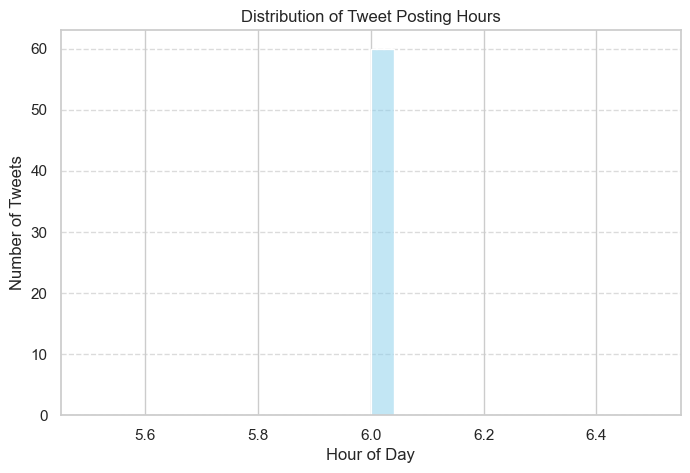

In [17]:
# 4. **Top Hours for Posting**
plt.figure(figsize=(8, 5))
sns.histplot(df['Hour_of_Post'], bins=24, kde=True, color='skyblue')
plt.title("Distribution of Tweet Posting Hours")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Tweets")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save current plot to PDF
pdf.savefig()  
plt.show()


# 5. **Most Common Words in Tweets**

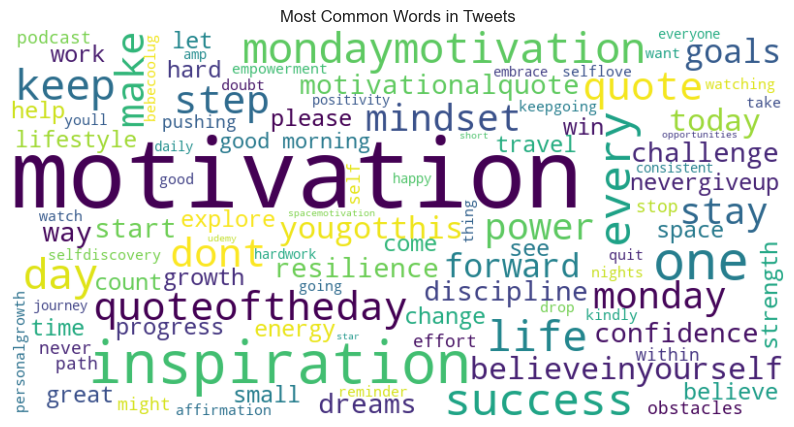

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all tweets into one string
all_words = ' '.join(text for text in df['Cleaned_Tweet'])

# Create the word cloud
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_words)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Tweets")

# Save current plot to PDF
pdf.savefig()
plt.show()



# 6. **Likes vs Retweets Scatter Plot**

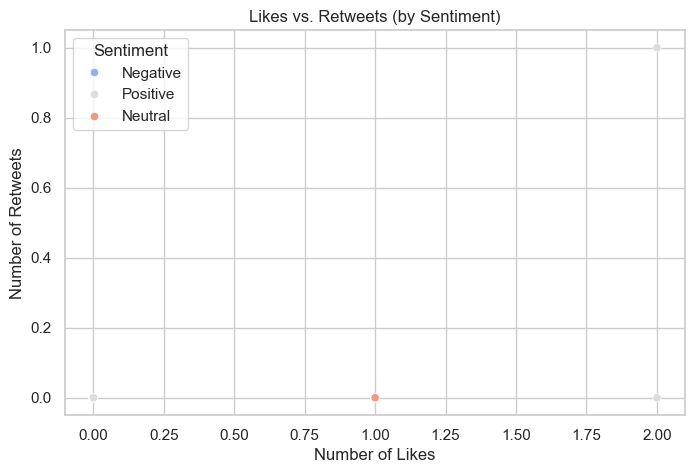

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Likes', y='Retweets', hue='Sentiment', data=df, palette='coolwarm')
plt.title("Likes vs. Retweets (by Sentiment)")
plt.xlabel("Number of Likes")
plt.ylabel("Number of Retweets")
plt.legend(title='Sentiment')
pdf.savefig()
plt.show()



# 7. **Engagement Over Different Hours**

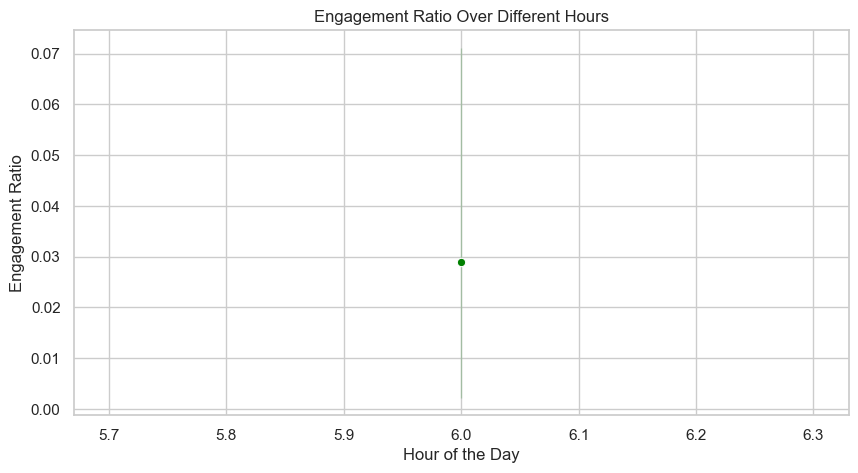

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(x='Hour_of_Post', y='Engagement_Ratio', data=df, marker='o', color='green')
plt.title("Engagement Ratio Over Different Hours")
plt.xlabel("Hour of the Day")
plt.ylabel("Engagement Ratio")
pdf.savefig()
plt.show()



# 8. **Sentiment Proportion by Day**

<Figure size 1000x600 with 0 Axes>

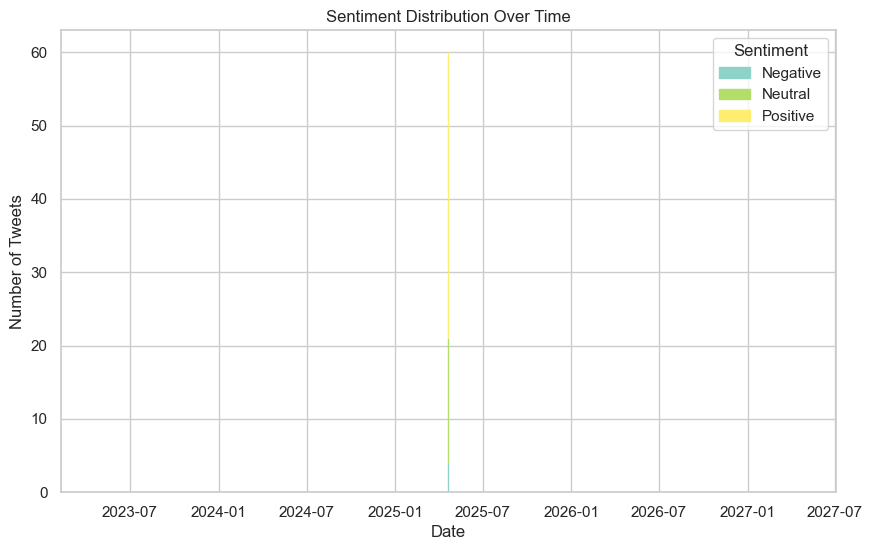

In [21]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sentiment_by_date = df.groupby(['Date', 'Sentiment']).size().unstack()
sentiment_by_date.plot(kind='area', stacked=True, colormap='Set3', figsize=(10, 6))
plt.title("Sentiment Distribution Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
pdf.savefig()
plt.show()


# 9. **Correlation Heatmap**

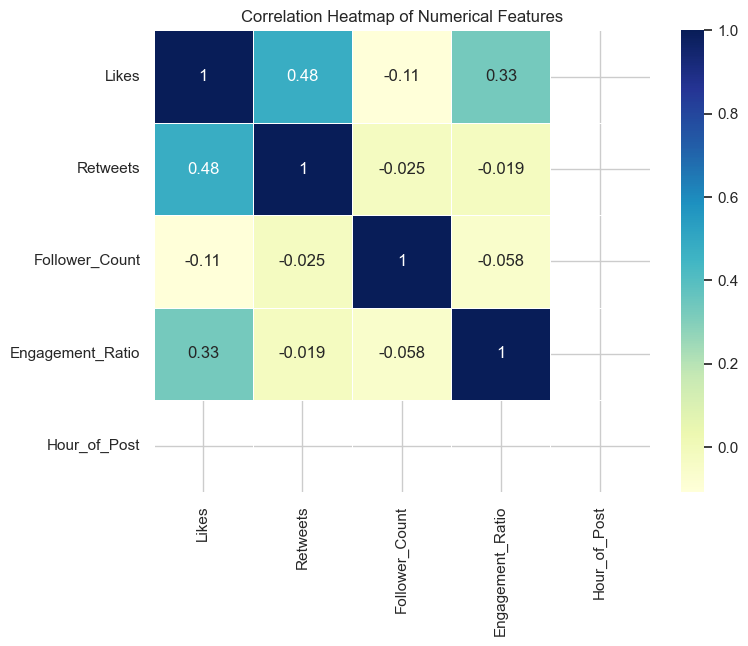

All charts saved to 'Sentiment_Analysis_Charts.pdf' successfully!


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Check if numeric_df has columns
if not numeric_df.empty:
    plt.figure(figsize=(8, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='YlGnBu', linewidths=0.5)
    plt.title("Correlation Heatmap of Numerical Features")
    pdf.savefig()
    plt.show()
else:
    print("No numeric columns available for correlation heatmap.")

pdf.close()
print("All charts saved to 'Sentiment_Analysis_Charts.pdf' successfully!")    
